In [183]:
#импортируем необходимое
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from numpy import exp
%matplotlib inline

# Центральная предельная теорема своими руками
## Логнормальное распределение

Будем рассматривать лог-нормальное распределение: такое, логарифм которого распределен нормальным образом. Для него функция плотности распределения имеет вид:
$$PDF = \frac{1}{x\sigma\sqrt{2\pi}}\ e^{-\frac{\left(\ln x-\mu\right)^2}{2\sigma^2}}$$
матожидание, медиана, мода и вариация, соответсвенно:
$$\mathbb{E}X      = e^{\mu+\sigma^2/2}$$
$$medX    = e^{\mu}$$
$$modeX  =  e^{\mu-\sigma^2}$$
$$varX = (e^{\sigma^2}\!\!-1) e^{2\mu+\sigma^2}$$

Как можно заметить, при больших значениях $\sigma$ это распределение очень сильно скошено. Ниже будем работать с $\mu = 2$ и $\sigma = 0.8$.

Создаем объекты:

In [184]:
sigma = 0.8
mu = 2
l_n = sts.lognorm(sigma, scale=np.exp(mu))
sampl = l_n.rvs(1000)
print "Среднее: {:.5f}\nСтандартное отклонение: {:.5f}".format(
    l_n.mean(),
    l_n.std()
    )

Среднее: 10.17567
Стандартное отклонение: 9.63460


Рисуем выборку (параметры "по умолчанию" тут работают не слишком хорошо, "хвост" распределения тянется далеко):

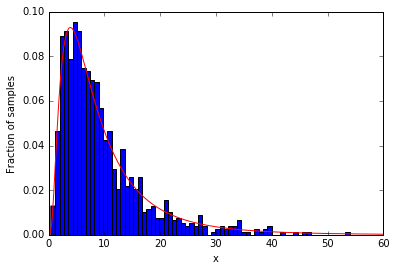

In [185]:
show_range = [0, 60]
plt.hist(sampl, normed=True, bins = 100)
x_ax = np.linspace(*show_range, num=200)
plt.plot(x_ax, l_n.pdf(x_ax), "r-")
plt.xlim(show_range)
plt.xlabel("x")
plt.ylabel("Fraction of samples")
plt.show()

Считаем средние для наборов по 10000 выборок различного объема n, для n = (5, 10, 30, 50, 100, 1000).
Это выполняется около 5 секунд, но на меньших объемах и числе выборок полная сходимость не достигается. 

In [193]:
%%time
repeat = 10000
samples = {}
sizes = 5, 10, 30, 50, 100, 1000
for n in sizes:
    samples[n] = [np.mean(l_n.rvs(n)) for i in xrange(repeat)]

Wall time: 5.8 s


Для каждого набора считаем параметры распределения (формулы для логнормального приведены выше), строим графики и проверяем сходимость среднего и дисперсии.

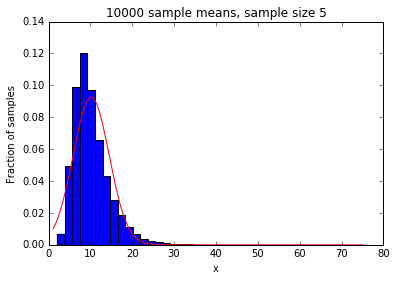

Ошибка мат. ожидания -0.0265, ошибка в дисперсии 0.1345


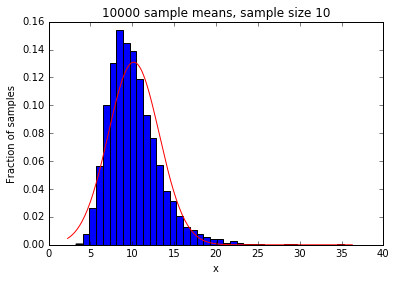

Ошибка мат. ожидания 0.0173, ошибка в дисперсии -0.0974


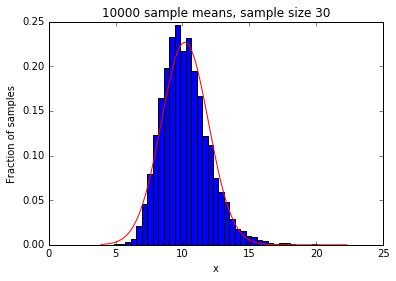

Ошибка мат. ожидания -0.0094, ошибка в дисперсии -0.0221


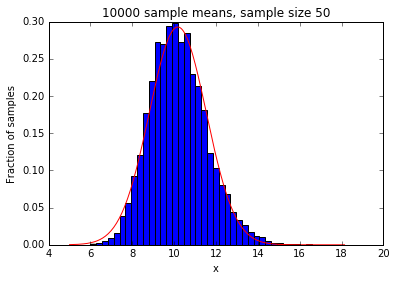

Ошибка мат. ожидания -0.0220, ошибка в дисперсии -0.0144


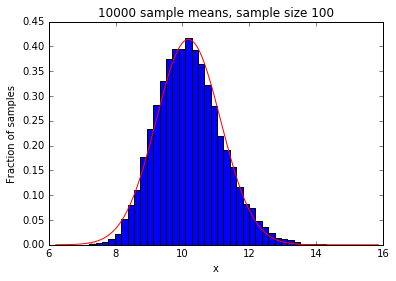

Ошибка мат. ожидания -0.0218, ошибка в дисперсии -0.0268


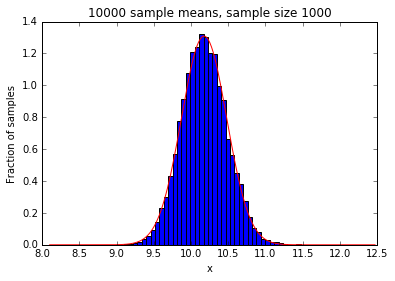

Ошибка мат. ожидания 0.0016, ошибка в дисперсии 0.0001


In [196]:
n_mean = exp(mu + sigma**2/2)   #ожидаемое среднее
for size in sorted(samples.keys()):
    x_ax = np.linspace(min(samples[size])-1, max(samples[size])+1, 200)
    #ожидаемое стандартное отклонение среднего на выборке размера size:
    n_stddev = np.sqrt((exp(sigma**2) - 1)*exp(2*mu + sigma**2)/size)                       
    norm_dist = sts.norm(loc = n_mean, scale = n_stddev)
    plt.hist(samples[size], normed = True, bins = 40)
    plt.plot(x_ax, norm_dist.pdf(x_ax), "r-")
    plt.title("{} sample means, sample size {}".format(repeat, size))
    plt.xlabel("x")
    plt.ylabel("Fraction of samples")
    plt.show()
    print "Ошибка мат. ожидания {:.4f}, ошибка в дисперсии {:.4f}".format(
        n_mean - np.mean(samples[size]),
        n_stddev**2 - np.var(samples[size])
        )

# Выводы
Логнормальное распределение сильно скошено, распределение средних по выборкам для него сходится к нормальному сравнительно медленно: несоответствие можно увидеть вплоть до объема выборки n=100.